# Example of shear-wave splitting applied to an icequake from Rutford Ice Stream, Antarctica

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import swspy
import obspy
from obspy import UTCDateTime
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

In [8]:
# Load data:
archive_path = "data/mseed"
archive_vs_file = "archive"
nonlinloc_event_path = "data/loc.Tom__RunNLLoc000.20090121.042009.grid0.loc.hyp"

starttime = UTCDateTime("20090121T042009.18523") - 0.5
endtime = UTCDateTime("20090121T042009.18523") + 2.5
load_wfs_obj = swspy.io.load_waveforms(archive_path, starttime, endtime)
load_wfs_obj.filter = True
load_wfs_obj.filter_freq_min_max = [1.0, 80.0]
st = load_wfs_obj.read_waveform_data()

In [9]:
# # Add noise to data:
# for i in range(len(st)):
#     st[i].data = st[i].data + 0.3*np.roll(st[i].data, int(np.random.uniform(-100, 100,1))) + 0.3*np.roll(st[i].data, int(np.random.uniform(-100, 100,1)))

In [44]:
# Calculate splitting:
splitting_event = swspy.splitting.create_splitting_object(st.select(station="ST01"), nonlinloc_event_path) #(st, nonlinloc_event_path) #(st.select(station="ST01"), nonlinloc_event_path)
splitting_event.overall_win_start_pre_fast_S_pick = 0.3 #0.1
splitting_event.win_S_pick_tolerance = 0.1
splitting_event.overall_win_start_post_fast_S_pick = 0.2 #0.2
splitting_event.rotate_step_deg = 1.0 #2.5
splitting_event.max_t_shift_s = 0.12
splitting_event.n_win = 10 #5 #10
# splitting_event.perform_sp
splitting_event.perform_sws_analysis(coord_system="ZNE") #(coord_system="LQT") #(coord_system="ZNE")


aaaaaaaaaaaaaaa


,station,phi,phi_from_N,phi_err,dt,dt_err
0,ST01,71.0,179.74,3.0,0.048,0.0185


<IPython.core.display.Javascript object>


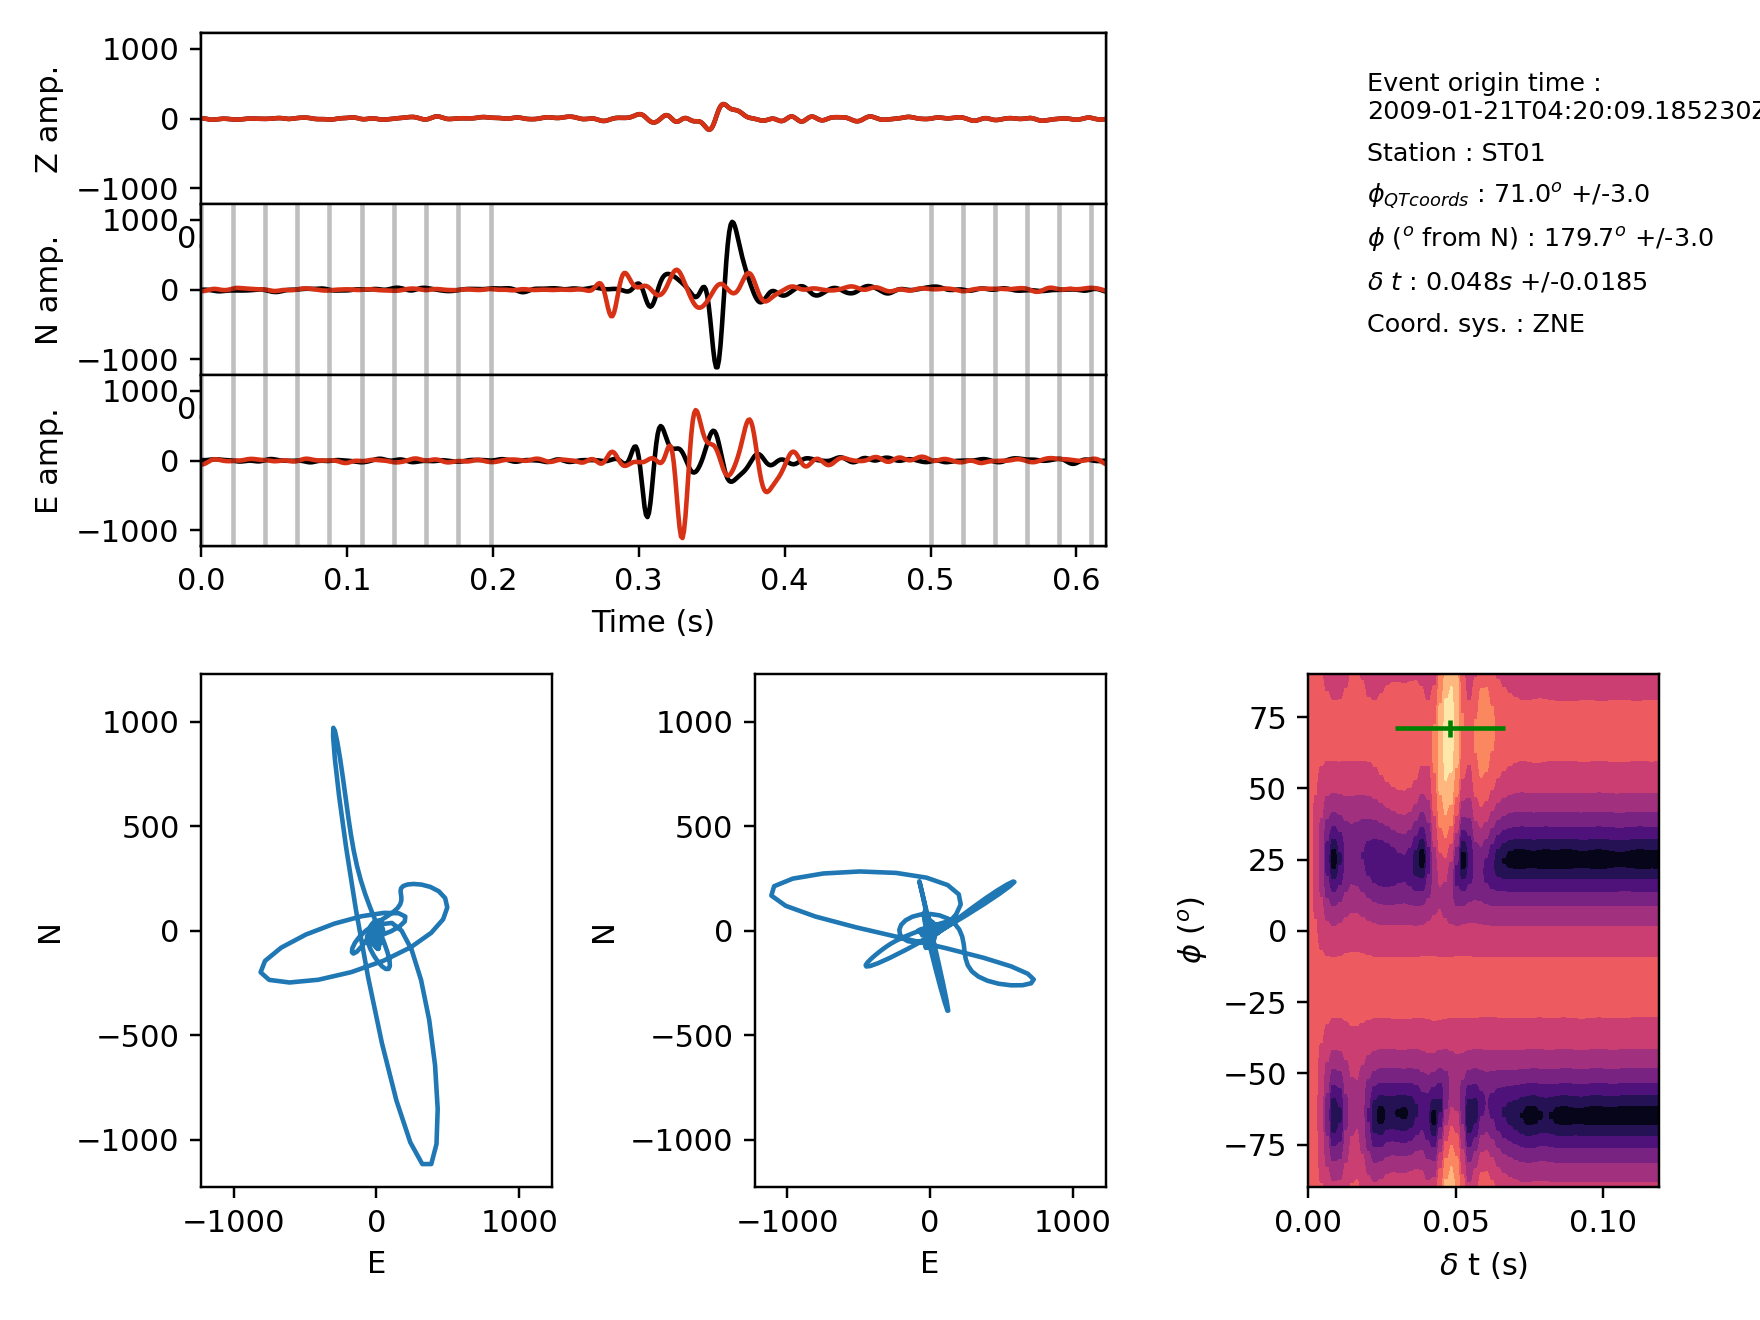

/Users/eart0504/Documents/python/github_repositories/swspy/swspy/splitting/split.py:700: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


In [48]:
splitting_event.plot()

In [ ]:
a = np.arange(6)
b = np.arange(6)
Y = np.dstack((a,b))[0,:,:]
Y.shape